In [10]:
# Packages
import pandas as pd
import statsmodels.api as sm
import statsmodels.tsa.statespace.sarimax as sarima
import matplotlib.pyplot as plt

In [11]:
# Data
mdata_obj = sm.datasets.get_rdataset(dataname="AirPassengers", package="datasets", cache=True)
mdata = mdata_obj.data
mdata = pd.DataFrame(data=mdata["value"]).set_index(pd.date_range(start="1949", end="1961", freq="ME"))
print(mdata.head())

            value
1949-01-31    112
1949-02-28    118
1949-03-31    132
1949-04-30    129
1949-05-31    121


In [8]:
print(mdata_obj.__doc__)

.. container::

   .. container::

      ============= ===============
      AirPassengers R Documentation
      ============= ===============

      .. rubric:: Monthly Airline Passenger Numbers 1949-1960
         :name: monthly-airline-passenger-numbers-1949-1960

      .. rubric:: Description
         :name: description

      The classic Box & Jenkins airline data. Monthly totals of
      international airline passengers, 1949 to 1960.

      .. rubric:: Usage
         :name: usage

      .. code:: R

         AirPassengers

      .. rubric:: Format
         :name: format

      A monthly time series, in thousands.

      .. rubric:: Source
         :name: source

      Box, G. E. P., Jenkins, G. M. and Reinsel, G. C. (1976) *Time
      Series Analysis, Forecasting and Control.* Third Edition.
      Holden-Day. Series G.

      .. rubric:: Examples
         :name: examples

      .. code:: R

         ## The classic 'airline model', by full ML
         (fit <- arima(log10(AirPassen

In [12]:
# Ranges Delimiting
tdata = mdata[:"1958-12-31"]
fdata = mdata["1959-01-01":]

In [70]:
# ARIMA Model
tmodel = sarima.SARIMAX(endog=tdata, order=(15,2,1), trend="n").fit()
fmodel = tmodel.forecast(steps=len(fdata))
fmodel = pd.DataFrame(fmodel).set_index(fdata.index)

C:\Users\Conno\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Conno\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


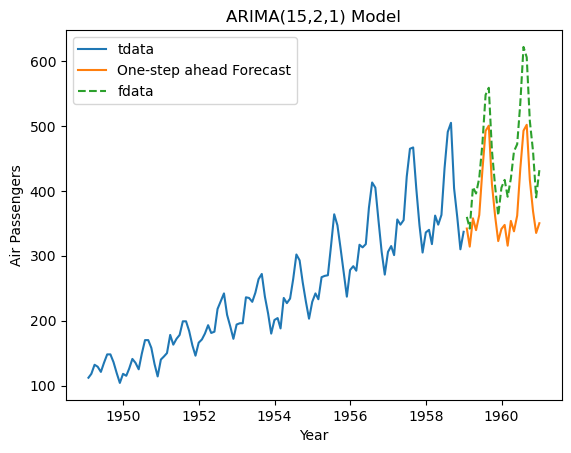

In [74]:
plt.plot(tdata, label="tdata")
plt.plot(fmodel, label='One-step ahead Forecast')
plt.plot(fdata, label="fdata", linestyle="--")
plt.legend(loc="upper left")
plt.title("ARIMA(15,2,1) Model")
plt.ylabel("Air Passengers")
plt.xlabel("Year")
plt.show()

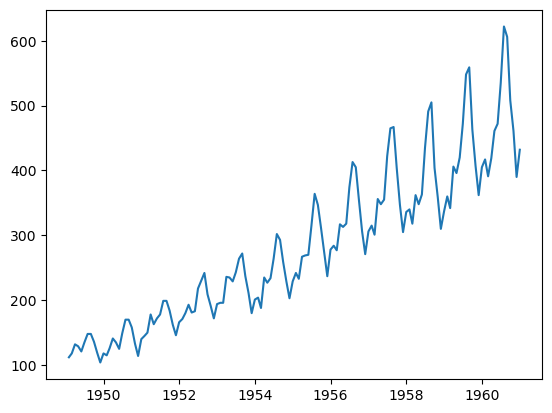

In [33]:
plt.plot(mdata)
plt.show()

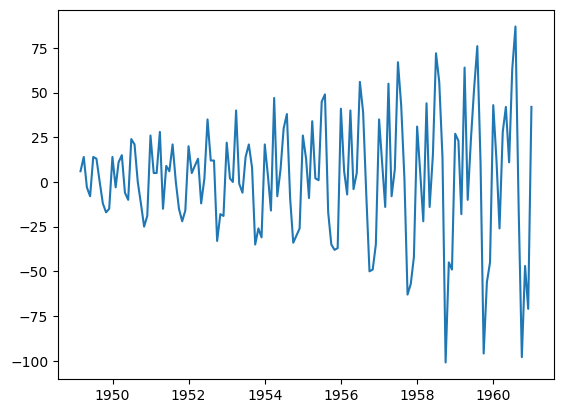

In [36]:
mdata_diff=mdata.diff().dropna()
plt.plot(mdata_diff)
plt.show()

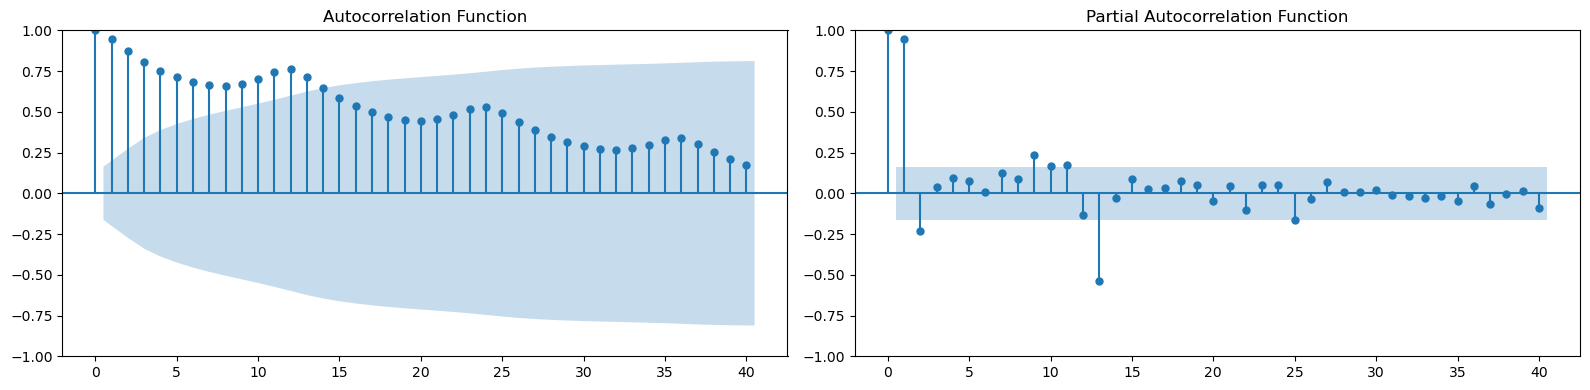

In [13]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(mdata, lags=40, ax=ax1)
ax1.set_title('Autocorrelation Function')
plot_pacf(mdata, lags=40, ax=ax2)
ax2.set_title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -456.103
Date:                            Thu, 22 Jan 2026   AIC                            922.205
Time:                                    12:38:12   BIC                            936.016
Sample:                                01-01-1949   HQIC                           927.812
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2298      0.401     -0.573      0.567      -1.016       0.557
ma.L1         -0.0987      0.374   

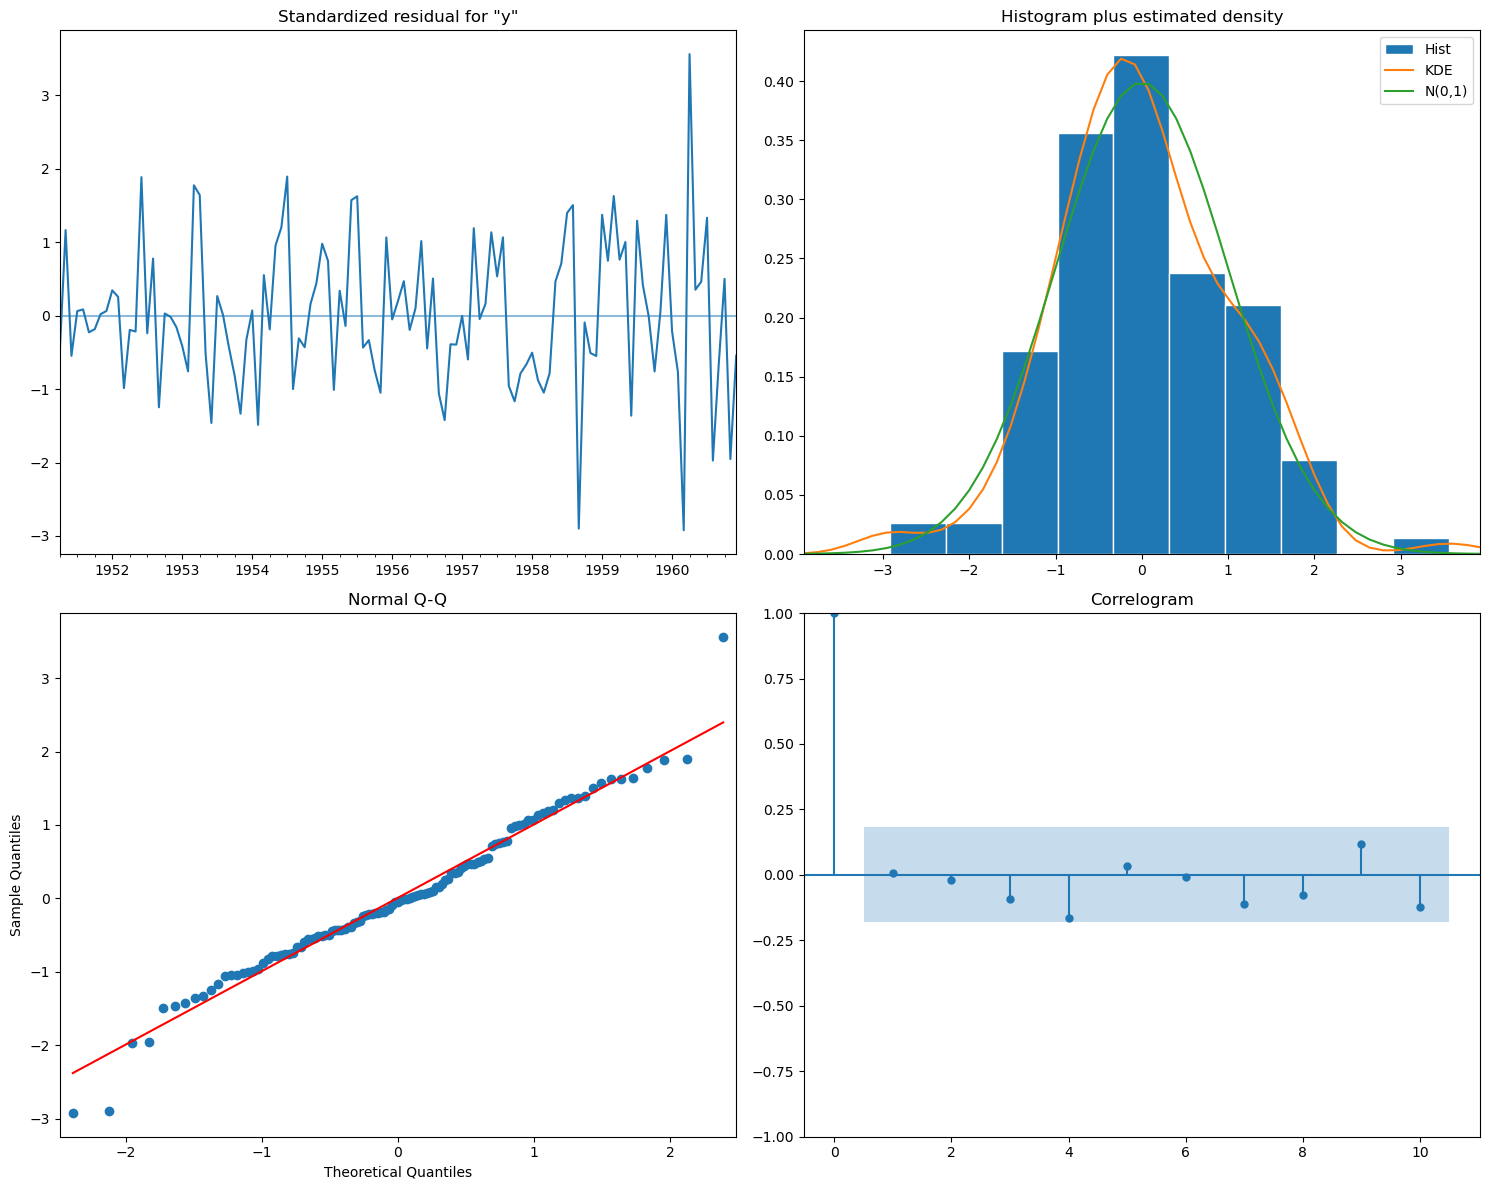

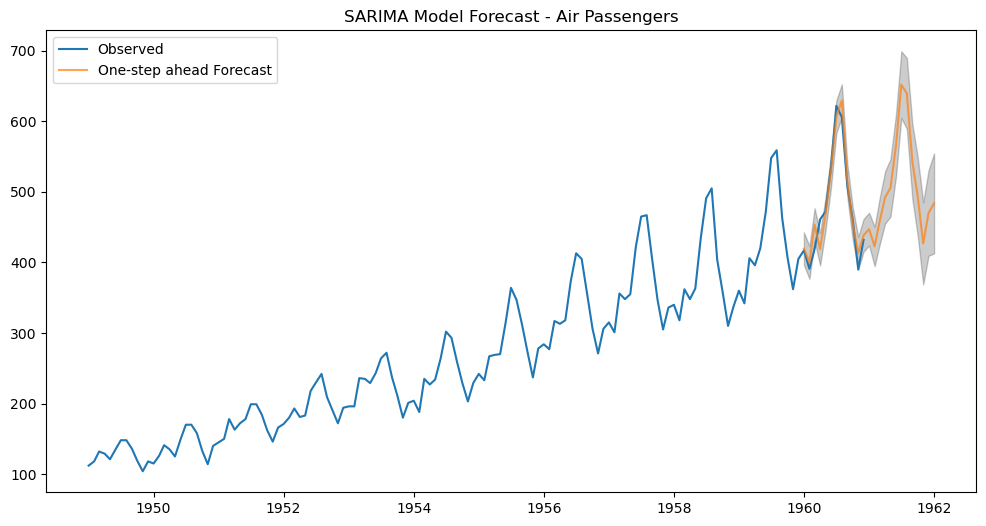

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.datasets import get_rdataset
air = get_rdataset('AirPassengers').data
mdata = pd.Series(air['value'].values, index=pd.date_range('1949-01-01', periods=len(air), freq='MS'))
model = SARIMAX(mdata, 
                order=(1, 1, 1),           
                seasonal_order=(1, 1, 1, 12), 
                enforce_stationarity=False,
                enforce_invertibility=False)
results = model.fit()
print(results.summary())
results.plot_diagnostics(figsize=(15, 12))
plt.tight_layout()
plt.show()
pred_start = len(mdata) - 12  
pred_end = len(mdata) + 12    
pred = results.get_prediction(start=pred_start, end=pred_end, dynamic=False)
pred_ci = pred.conf_int()

plt.figure(figsize=(12, 6))
plt.plot(mdata, label='Observed')
plt.plot(pred.predicted_mean, label='One-step ahead Forecast', alpha=0.7)
plt.fill_between(pred_ci.index,
                 pred_ci.iloc[:, 0],
                 pred_ci.iloc[:, 1], color='k', alpha=0.2)
plt.legend()
plt.title('SARIMA Model Forecast - Air Passengers')
plt.show()